In [2]:
def multibody_solver_2d(mass, initial_pos, initial_speed, dt=0.1,time=100):
    position = []
    velocity = []
    for i in range(len(mass)):
        position.append([initial_pos[i]])
        velocity.append([initial_speed[i]])
    for i in range(int(time/dt) - 1):
        pos = []
        vel = []
        for j in range(len(mass)):
            pos.append(position[j][i])
            vel.append(velocity[j][i])
        accels = cal_accel(pos, mass)
        for j in range(len(mass)):
            ax,ay =accels[j][0], accels[j][1]
            velocity[j].append([vel[j][0] + ax*dt,vel[j][1] + ay*dt])
            position[j].append([pos[j][0] + velocity[j][i+1][0]*dt,pos[j][1] + velocity[j][i+1][1]*dt])
    return position, velocity

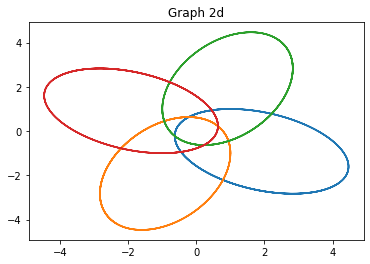

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
##Implementation of 2D equation solver

G = 1

def force1(position, mass):
    """
    calculates the force between two planets onto the first planet
    
    >>> pos = [[1, 1], [-1, -1]]
    >>> mass = [1, 1]
    >>> ax, ay = force1(pos, mass)
    >>> print(ax, ay)
    -0.08838834764831843 -0.08838834764831843
    """
    
    r_square = ((position[0][0] - position[1][0])**2 + (position[0][1]-position[1][1])**2)
    f = G*mass[0]*mass[1]/r_square
    r_hat = np.array([position[1][0] - position[0][0], position[1][1] - position[0][1]])/math.sqrt(r_square)
    return f*r_hat[0] , f*r_hat[1]
    
def force2(position, mass):
    """
    calculates the force between two planets onto the second planet
    
    >>> pos = [[1, 1], [-1, -1]]
    >>> mass = [1, 1]
    >>> ax, ay = force1(pos, mass)
    >>> print(ax, ay)
    0.08838834764831843 0.08838834764831843
    """
    r_square = ((position[0][0] - position[1][0])**2 + (position[0][1]-position[1][1])**2)
    f = G*mass[0]*mass[1]/r_square
    r_hat = np.array([position[0][0] - position[1][0], position[0][1] - position[1][1]])/math.sqrt(r_square)
    return f*r_hat[0] , f*r_hat[1]

def cal_accel(pos, mass):
    """
    giving a list of positions and a list of planet masses,
    calculates the acceleration of every planet at that instant.
    """
    accels = [[0, 0] for i in range(len(mass))]
    for i in range(len(mass) - 1):
        for j in range(i + 1, len(mass)):
            p = [pos[i], pos[j]]
            m = [mass[i], mass[j]]
            f_1_x, f_1_y = force1(p, m)
            a_1_x, a_1_y = f_1_x/m[0], f_1_y/m[0]
            f_2_x, f_2_y = force2(p, m)
            a_2_x, a_2_y = f_2_x/m[1], f_2_y/m[1]
            
            accels[i][0] += a_1_x
            accels[i][1] += a_1_y
            accels[j][0] += a_2_x
            accels[j][1] += a_2_y
    return accels

mass = [1, 1, 1, 1]
initial_position = [[1,1],[1,-1], [-1, 1], [-1, -1]]
initial_velocity = [[-1,0],[0,1], [0, -1], [1,0]]
# mass = [4, 1]
# initial_position = [[0,0],[0.3,0]]
# initial_velocity = [[0,-1],[0,4]]
dt = 0.001
total_time = 100


position,velocity = multibody_solver_2d(mass,initial_position,initial_velocity,dt,total_time)

planets = []
for k in range(len(mass)):
    x = []
    y = []
    for i in range(len(position[0])):
        x.append(position[k][i][0])
        y.append(position[k][i][1])
    planets.append([x, y])

plt.title("Graph 2d")

for i in range(len(mass)):
    plt.plot(planets[i][0], planets[i][1])

plt.show()

##Implementation of the 1D equation solver
# def force3(position,velocity,mass, time):
#     return  -(position[0] - np.sin(np.pi*time)) - (position[0] - position[1])

# def force4(position,velocity,mass, time):
#     return -position[1] - (position[1]-position[0])

# force = [force3,force4]
# mass = [1,1]
# initial_position = [1,0]
# initial_velocity = [0,0]
# dt = 0.01
# total_time = 100


# position,velocity = multibody_solver_1d(mass,force,initial_position,initial_velocity,dt,total_time)

# time = np.arange(0,total_time,dt)

# plt.title("Graph 1d")
# plt.plot(time,position[0])
# plt.show()